In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
pd.set_option('max_columns',50)

In [2]:
plays = pd.read_csv('data/plays.csv')
data = pd.read_csv('data/all_tracking.csv')

In [3]:
plays.head(10)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False
6,2018090600,344,(9:24) (Shotgun) N.Foles pass incomplete short...,1,3,4,PHI,play_type_pass,PHI,8,EMPTY,"1 RB, 2 TE, 2 WR",6.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,09:24:00,18.0,NaN,NaN,I,0,0,-1.192208,False
7,2018090600,402,(9:08) M.Ryan pass incomplete deep left to M.S...,1,1,10,ATL,play_type_pass,PHI,44,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,09:08:00,54.0,NaN,NaN,I,0,0,-0.429863,False
8,2018090600,492,(7:01) M.Ryan pass short left to T.Coleman pus...,1,2,13,ATL,play_type_pass,PHI,36,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,07:01:00,46.0,NaN,NaN,C,26,26,1.879804,False
9,2018090600,521,(6:19) M.Ryan pass short left to A.Hooper to P...,1,1,10,ATL,play_type_pass,PHI,10,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,3.0,"4 DL, 2 LB, 5 DB",DESIGNED_ROLLOUT_LEFT,0.0,0.0,06:19:00,20.0,NaN,NaN,C,3,3,0.045665,False


In [64]:
def get_playId(plays,gameId):
    try:
        return plays[plays['gameId']==gameId]['playId'].values
    except Exception as e:
        print(e)

In [65]:
def get_plays(plays,gameId):
    try:
        return plays[plays['gameId']==gameId]
    except Exception as e:
        print(e)

In [66]:
def get_track_game(track,gameId):
    try:
        return track[track['gameId']==gameId]
    except Exception as e:
        print(e)

In [67]:
def get_track_play(track,playId):
    try:
        return track[track['playId']==playId]
    except Exception as e:
        print(e)

In [68]:
def get_track_team(track,team):
    try:
        return track[track['team']==team]
    except Exception as e:
        print(e)

In [69]:
def get_coord(track):
    try:
        c_x = {}
        c_y = {}
        for f in set(track['frameId']):
            c_x[f] = [x for x,x_f in zip(track['x'],track['frameId']) if x_f==f]
            c_y[f] = [y for y,y_f in zip(track['y'],track['frameId']) if y_f==f]

        return c_x,c_y
    except Exception as e:
        print(e)

In [127]:
def animate_play(playId,home_coord,away_coord,football_coord,plays):
    try:
        anim_fig,anim_ax = plt.subplots(figsize=(15,10))
        img = plt.imread('football_field_grayscale.png')
        anim_ax.imshow(img,extent=[0,120,0,53.34])

        h, = anim_ax.plot(home_coord.iloc[0]['h_x'],home_coord.iloc[0]['h_y'],'ro')
        a, = anim_ax.plot(away_coord.iloc[0]['a_x'],away_coord.iloc[0]['a_y'],'bo')
        f, = anim_ax.plot(football_coord.iloc[0]['f_x'],football_coord.iloc[0]['f_y'],'yo')

        def animate(i):
            h.set_data(home_coord.iloc[i]['h_x'],home_coord.iloc[i]['h_y'])
            a.set_data(away_coord.iloc[i]['a_x'],away_coord.iloc[i]['a_y'])
            f.set_data(football_coord.iloc[i]['f_x'],football_coord.iloc[i]['f_y'])

            return h,a,f,

        anim_ax.set_title(plays[plays['playId']==playId].iloc[0]['playDescription'])
        animation_gif = animation.FuncAnimation(anim_fig,animate,frames=range(1,len(home_coord.index)),interval=85)

        return animation_gif
    except Exception as e:
        print(e)

In [114]:
GAME_ID = 2018090901
PLAY_ID = 72
play_ids = get_playId(plays,GAME_ID)
event_game1 = get_plays(plays,GAME_ID)
track_game1 = get_track_game(data,GAME_ID)

In [115]:
track_game1.shape

(95484, 19)

In [116]:
track_game1

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
81362,2018-09-09T17:03:55.799Z,32.31,26.44,0.00,0.00,0.01,86.65,301.36,None,2506109.0,Ben Roethlisberger,7.0,QB,1,away,2018090901,72,right,NaN
81365,2018-09-09T17:03:55.799Z,36.96,44.18,0.00,0.00,0.00,96.54,6.27,None,2508061.0,Antonio Brown,84.0,WR,1,away,2018090901,72,right,GO
81369,2018-09-09T17:03:55.799Z,36.96,10.28,0.00,0.00,0.00,69.80,239.37,None,2540151.0,Justin Hunter,11.0,WR,1,away,2018090901,72,right,GO
81371,2018-09-09T17:03:55.799Z,39.05,43.80,0.00,0.00,0.01,270.62,18.41,None,2543637.0,Terrance Mitchell,39.0,CB,1,home,2018090901,72,right,NaN
81372,2018-09-09T17:03:55.799Z,40.49,28.17,0.08,2.50,0.02,263.56,261.81,None,2543720.0,Christian Kirksey,58.0,OLB,1,home,2018090901,72,right,NaN
81374,2018-09-09T17:03:55.799Z,57.28,30.78,0.00,0.00,0.00,283.13,254.79,None,2552389.0,Damarious Randall,23.0,CB,1,home,2018090901,72,right,NaN
81378,2018-09-09T17:03:55.799Z,35.66,22.02,0.00,0.00,0.01,123.47,311.57,None,2552633.0,Jesse James,81.0,TE,1,away,2018090901,72,right,SLANT
81379,2018-09-09T17:03:55.799Z,41.36,25.50,0.00,0.00,0.01,260.52,262.03,None,2555166.0,Joe Schobert,53.0,MLB,1,home,2018090901,72,right,NaN
81385,2018-09-09T17:03:55.799Z,39.00,16.88,0.02,0.03,0.02,243.74,167.68,None,2556475.0,Briean Boddy-Calhoun,20.0,CB,1,home,2018090901,72,right,NaN
81388,2018-09-09T17:03:55.799Z,32.01,28.73,0.00,0.00,0.00,92.60,174.63,None,2557978.0,James Conner,30.0,RB,1,away,2018090901,72,right,FLAT


In [117]:
play_track_game1 = {}

for ids in tqdm(play_ids):
    play_track_game1[ids] = get_track_play(track_game1,ids)

100%|██████████| 94/94 [00:00<00:00, 532.76it/s]


In [118]:
play_track_game1.keys()

dict_keys([72, 96, 157, 248, 291, 339, 405, 439, 493, 523, 566, 613, 635, 680, 704, 865, 854, 977, 1021, 1112, 1136, 1177, 1306, 1330, 1452, 1516, 1563, 1682, 1742, 1766, 1849, 1890, 1912, 1976, 2055, 2324, 2448, 2522, 2570, 2613, 2757, 2800, 2841, 2863, 2885, 2972, 3038, 3079, 3143, 3267, 3295, 3325, 3441, 3482, 3552, 3600, 3622, 3644, 3718, 3837, 3867, 3938, 4020, 4161, 4189, 4267, 4289, 4311, 4414, 4438, 4495, 4596, 4620, 4688, 4751, 4762, 4809, 4896, 4924, 4983, 5005, 5050, 5150, 5211, 5233, 5276, 5323, 5347, 5369, 5449, 5511, 1199, 1373, 3234])

In [119]:
track_game1_play1 = get_track_play(track_game1,PLAY_ID)
home_track_game1 = get_track_team(track_game1_play1,'home')
away_track_game1 = get_track_team(track_game1_play1,'away')
football_track_game1 = get_track_team(track_game1_play1,'football')

In [120]:
home_coord_play1 = {}
away_coord_play1 = {}
football_coord_play1 = {}

home_coord_play1['h_x'],home_coord_play1['h_y'] = get_coord(home_track_game1)
away_coord_play1['a_x'],away_coord_play1['a_y'] = get_coord(away_track_game1)
football_coord_play1['f_x'],football_coord_play1['f_y'] = get_coord(football_track_game1)

home_coord_play1 = pd.DataFrame(home_coord_play1)
away_coord_play1 = pd.DataFrame(away_coord_play1)
football_coord_play1 = pd.DataFrame(football_coord_play1)

In [121]:
home_coord_play1

,h_x,h_y
1,"[39.05, 40.49, 57.28, 41.36, 39.0, 41.56, 38.72]","[43.8, 28.17, 30.78, 25.5, 16.88, 21.68, 10.58]"
2,"[39.05, 40.49, 57.28, 41.36, 39.0, 41.57, 38.72]","[43.8, 28.2, 30.78, 25.51, 16.87, 21.69, 10.58]"
3,"[39.05, 40.5, 57.28, 41.35, 39.0, 41.57, 38.72]","[43.79, 28.26, 30.78, 25.51, 16.84, 21.69, 10.58]"
4,"[39.05, 40.51, 57.28, 41.35, 39.0, 41.57, 38.72]","[43.79, 28.32, 30.78, 25.51, 16.84, 21.68, 10.58]"
5,"[39.04, 40.53, 57.28, 41.35, 39.0, 41.58, 38.72]","[43.79, 28.41, 30.78, 25.51, 16.81, 21.68, 10.58]"
6,"[39.04, 40.55, 57.29, 41.35, 38.99, 41.58, 38.72]","[43.79, 28.51, 30.78, 25.51, 16.8, 21.67, 10.58]"
7,"[39.05, 40.56, 57.29, 41.34, 38.99, 41.58, 38.72]","[43.79, 28.62, 30.78, 25.51, 16.82, 21.68, 10.58]"
8,"[39.04, 40.58, 57.29, 41.34, 38.98, 41.58, 38.72]","[43.79, 28.74, 30.78, 25.51, 16.85, 21.68, 10.58]"
9,"[39.04, 40.58, 57.28, 41.34, 38.98, 41.58, 38.71]","[43.79, 28.86, 30.78, 25.51, 16.84, 21.68, 10.58]"
10,"[39.04, 40.58, 57.28, 41.34, 38.97, 41.58, 38.72]","[43.79, 28.98, 30.78, 25.51, 16.84, 21.68, 10.58]"


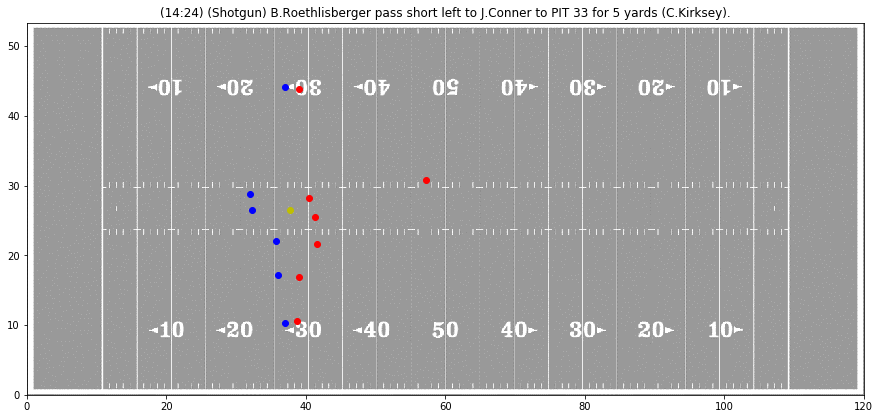

In [122]:
play1_gif = animate_play(PLAY_ID,home_coord_play1,away_coord_play1,football_coord_play1,plays)

In [123]:
type(play1_gif)

matplotlib.animation.FuncAnimation

In [124]:
home_coord_play1.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72],
           dtype='int64')

In [125]:
play1_gif.save('general_test.mp4',writer='ffmpeg')